In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.random.uniform(size=(200,2))
x[:,0] = (x[:,0]-0.5)*10
x[:,1] = (x[:,1]-0.6)*15

In [3]:
y = (((x[:,0]**2 + x[:,1]**2) < 25) & ((x[:,0]**2 + x[:,1]**2) > 10))

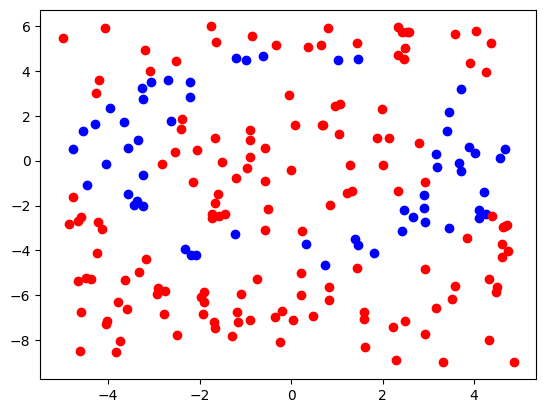

In [4]:
plt.scatter(x[y==True,0], x[y==True,1], color = 'b')
plt.scatter(x[y==False,0], x[y==False,1], color = 'r')


In [51]:
class KNN():
    def __init__(self, k: int = 3) -> None:
        self.k = k
    
    def fit(self, x, y):
        self.data = x  # (train size, input dim)
        self.label = y # (train size)
    
    def predict(self, x):
        # x can be (batch_size, input_dim)
        def _predict_single(x):
            dist = np.linalg.norm(np.transpose(self.data) - x.reshape((-1,1)), axis=0)
            idx = np.argpartition(dist, kth=self.k)[:self.k] # index of k closest point
            return (self.label[idx].mean()>=0.5)
            
        if len(x.shape)>1:
            assert (x.shape[1]==self.data.shape[1]), "Input dimension does not match!"
            res = []
            for i in range(len(x)):
                res.append(_predict_single(x[i]))
            return np.array(res)
                
        else:
            return np.array(_predict_single(x))

In [52]:
np.random.seed(12)
test_idx = np.random.choice(len(x), int(0.3*len(x)), replace=False)
train_idx = np.array(list(set([i for i in range(len(x))]) - set(list(test_idx))))
X_train, y_train = x[train_idx], y[train_idx]
X_test, y_test = x[test_idx], y[test_idx]

In [57]:
clf = KNN(k=3)

In [58]:
clf.fit(X_train, y_train)

In [59]:
(clf.predict(X_train) == y_train).mean()

0.95

In [60]:
(clf.predict(X_test) == y_test).mean()

0.95